In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt


In [2]:
df=pd.read_excel(io='sales_rep.xlsx',sheet_name='sales_data_sample')
df2=pd.read_excel(io='sales_rep.xlsx',sheet_name='Sales_rep',)

In [3]:
df.head(2)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE
0,10223,37,100.0,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium
1,10309,41,100.0,5,4394.38,10/15/2004 0:00,Shipped,Motorcycles,95,S10_1678,Baane Mini Imports,Stavern,4110,Norway,Medium


In [4]:
df2.head(2)

,SALES_REP_ID,Name,First Name,Last Name,Gender,Photo Img
0,1,Harmani Calderoni,Harmani,Calderoni,M,https://images.pexels.com/photos/91227/pexels-...
1,2,Singleton Ashton,Singleton,Ashton,M,https://images.pexels.com/photos/718261/pexels...


In [5]:
df=df.iloc[:,0:].merge(df2.iloc[:,:2],left_on='ORDERLINENUMBER',right_on='SALES_REP_ID')

In [6]:
df.head(10)

,ORDERNUMBER,QUANTITYORDERED,PRICEEACH,ORDERLINENUMBER,SALES,ORDERDATE,STATUS,PRODUCTLINE,MSRP,PRODUCTCODE,CUSTOMERNAME,CITY,POSTALCODE,COUNTRY,DEALSIZE,SALES_REP_ID,Name
0,10223,37,100.00,1,3965.66,2/20/2004 0:00,Shipped,Motorcycles,95,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,1,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11 00:00:00,Shipped,Motorcycles,95,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,1,Harmani Calderoni
2,10210,34,100.00,1,6123.40,2004-12-01 00:00:00,Shipped,Motorcycles,193,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
3,10377,50,100.00,1,5182.00,2005-09-02 00:00:00,Shipped,Classic Cars,115,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,1,Harmani Calderoni
4,10419,37,100.00,1,5202.94,5/17/2005 0:00,Shipped,Classic Cars,124,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,1,Harmani Calderoni
5,10405,55,100.00,1,8289.05,4/14/2005 0:00,Shipped,Classic Cars,169,S18_3232,Mini Caravy,Strasbourg,67000,France,Large,1,Harmani Calderoni
6,10392,36,100.00,1,4035.96,2005-10-03 00:00:00,Shipped,Vintage Cars,99,S18_3320,Mini Auto Werke,Graz,8010,Austria,Medium,1,Harmani Calderoni
7,10240,37,100.00,1,5959.22,4/13/2004 0:00,Shipped,Classic Cars,141,S18_3685,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,1,Harmani Calderoni
8,10105,50,79.67,1,3983.50,2003-11-02 00:00:00,Shipped,Vintage Cars,83,S24_3816,Danish Wholesale Imports,Kobenhavn,1734,Denmark,Medium,1,Harmani Calderoni
9,10317,35,83.32,1,2916.20,2004-02-11 00:00:00,Shipped,Planes,72,S24_4278,Technics Stores Inc.,Burlingame,94217,USA,Small,1,Harmani Calderoni


In [7]:
print(df.shape)
df.info()

(2823, 17)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ORDERNUMBER      2823 non-null   int64  
 1   QUANTITYORDERED  2823 non-null   int64  
 2   PRICEEACH        2823 non-null   float64
 3   ORDERLINENUMBER  2823 non-null   int64  
 4   SALES            2823 non-null   float64
 5   ORDERDATE        2823 non-null   object 
 6   STATUS           2823 non-null   object 
 7   PRODUCTLINE      2823 non-null   object 
 8   MSRP             2823 non-null   int64  
 9   PRODUCTCODE      2823 non-null   object 
 10  CUSTOMERNAME     2823 non-null   object 
 11  CITY             2823 non-null   object 
 12  POSTALCODE       2747 non-null   object 
 13  COUNTRY          2823 non-null   object 
 14  DEALSIZE         2823 non-null   object 
 15  SALES_REP_ID     2823 non-null   int64  
 16  Name             2823 non-null   object 
dtypes: 

### The Data Structure
The data comprise 2823 rows and 17 columns (features). 6 of these 17 columns (35.3%) are numeric variables

The DEALSIZE is the only ordered factor variable (Small->Medium->Large)

The rest of the variables are non-numeric and they are self-explanatory from their column's name

## Data Accessment
***

## Data Cleaning
***

In [8]:
x=[x.lower() for x in df.columns ]

In [9]:
# paste and edit output x
x=['order_number',
 'quantity_ordered',
 'price_each',
 'order_line_number',
 'sales',
 'order_date',
 'status',
 'product_line',
 'msrp',
 'product_code',
 'customer_name',
 'city',
 'postal_code',
 'country',
 'deal_size',
 'sales_rep_id',
 'name']
# replace data frame's columns with x
df.columns=x

In [10]:
df.order_number=df.order_number.astype(str)
df.order_line_number=df.order_line_number.astype(str)
df.drop(['sales_rep_id','msrp'],axis=1,inplace=True)

In [11]:
df['order_date']=pd.to_datetime(df['order_date'])

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 0 to 2822
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_number       2823 non-null   object        
 1   quantity_ordered   2823 non-null   int64         
 2   price_each         2823 non-null   float64       
 3   order_line_number  2823 non-null   object        
 4   sales              2823 non-null   float64       
 5   order_date         2823 non-null   datetime64[ns]
 6   status             2823 non-null   object        
 7   product_line       2823 non-null   object        
 8   product_code       2823 non-null   object        
 9   customer_name      2823 non-null   object        
 10  city               2823 non-null   object        
 11  postal_code        2747 non-null   object        
 12  country            2823 non-null   object        
 13  deal_size          2823 non-null   object        
 14  name    

In [13]:
df.head(2)

,order_number,quantity_ordered,price_each,order_line_number,sales,order_date,status,product_line,product_code,customer_name,city,postal_code,country,deal_size,name
0,10223,37,100.00,1,3965.66,2004-02-20,Shipped,Motorcycles,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,Harmani Calderoni
1,10318,46,94.74,1,4358.04,2004-02-11,Shipped,Motorcycles,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,Harmani Calderoni


In [14]:
cost_of_goods=df.quantity_ordered*df.price_each
df.insert(3,column='cost_of_goods',value=cost_of_goods)


In [15]:
profit=df.sales-round(df.cost_of_goods,2)
df.insert(6,column='profit',value=profit)

In [16]:
print('The data frame conatins {} duplicate(s)'.format (df.duplicated().sum()))

The data frame conatins 0 duplicate(s)


## Exploratory Data Analysis
***

In [17]:
df.describe()

,quantity_ordered,price_each,cost_of_goods,sales,profit
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000
mean,35.092809,83.658544,2936.906408,3553.889072,616.982664
std,9.741443,20.174277,1105.644284,1841.865106,1047.728887
min,6.000000,26.880000,482.130000,482.130000,0.000000
25%,27.000000,68.860000,2100.000000,2203.430000,0.000000
50%,35.000000,95.700000,2800.000000,3184.800000,0.000000
75%,43.000000,100.000000,3726.810000,4508.000000,925.180000
max,97.000000,100.000000,9048.160000,14082.800000,7536.500000


## Univariate Exploration
***

## What is the distribution of sales made throughout the period given?

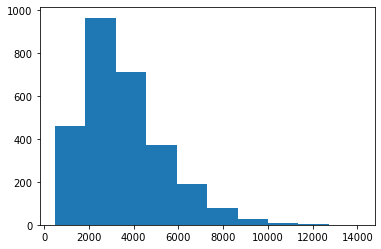

In [49]:

plt.hist(data=df, x='sales');
#plt.axvline(x = df.describe().iloc[1, 3], color = 'red')
#plt.axvline(x = df.describe().iloc[5, 3], color = 'green')
plt.show()

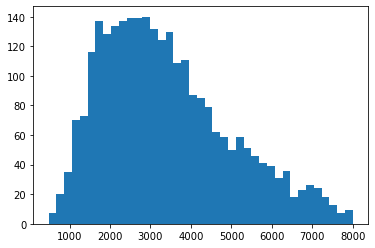

In [19]:
plt.hist(data=df, x='sales',bins=np.linspace(482, 8000, 40))
plt.show()

<AxesSubplot:xlabel='sales', ylabel='Density'>

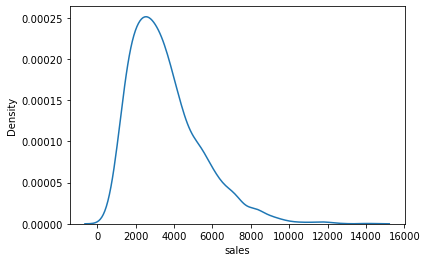

In [20]:
sns.kdeplot(data=df.sales)

>- The distribution of the sales data is right skewed due to the presence of far more expensive goods in the mix.
>- The second plot shows a unimodal distribution with the peak around 3000 dollars
>- Third plot display vividly the right skewness of the sales distribution


## What is the distribution of profit made by the company throughout the period?

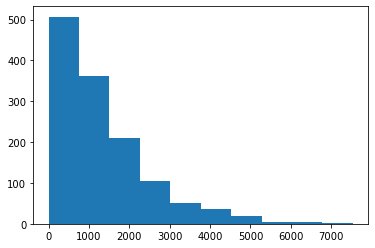

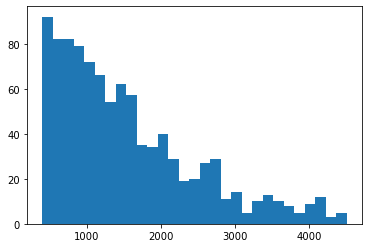

<AxesSubplot:xlabel='profit', ylabel='Density'>

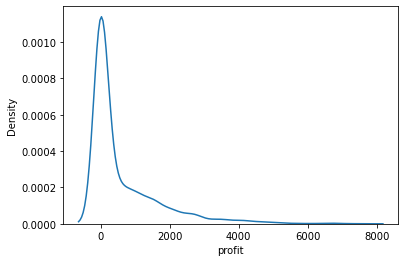

In [50]:
plt.hist(data=df[df.profit>0], x='profit')
plt.show()
bins=np.linspace(400,4500,30)
plt.hist(data=df[df.profit>0], x='profit',bins=bins)
#ticks=[2e2,2e3,4e3,6e3,8e3]
#label=['0.2k','2k','4k','6k','8k']
#plt.xticks(ticks, label)
plt.show()
sns.kdeplot(df.profit)

>### Observation
>- The plot shows a unimodal distribution that is severely skewed to the right.And apparently, the mode appears to be 0. While zero gains were recorded on many sales, it will be benefecial for us to zoom into the distribution with profit > 0.
>- The second plot shows a unimodal of profit with peak around 200 dollars


## What is the distribution of the quantity of goods ordered by customers?

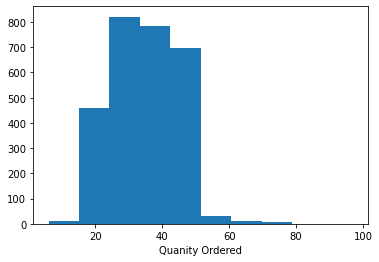

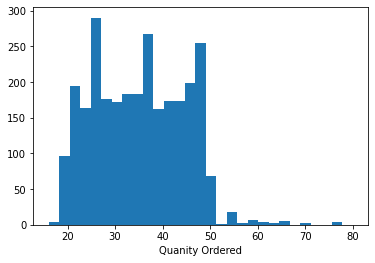

In [23]:
plt.hist(data=df,x='quantity_ordered')
plt.xlabel("Quanity Ordered")
plt.show()
bin_s=np.linspace(16,80,30)
plt.hist(data=df,x='quantity_ordered',bins=bin_s)
plt.xlabel("Quanity Ordered")
plt.show()

>### Observation
>The first graph shows clearly that there is a high proportion of orders between 20 and 50 placed by the customers 
> Order quantity displays a multimodal distribution with peak around 27,37, and 47 respectively. This strongly suggests that customers have differents needs from one and the other

## How are the following features distributed: names,status,product_line, deal_size

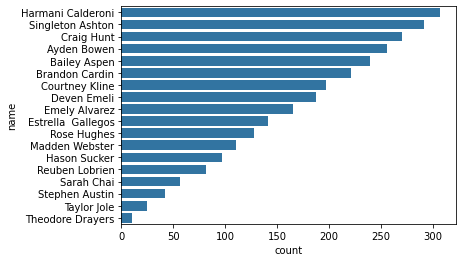

In [24]:
b_color=sns.color_palette()[0]
sns.countplot(data=df,y='name',color=b_color,order=df.name.value_counts().index)
plt.show()

>- Harmani Calderoni was able to pull about 300 (10.9%) customers within the period given in the data
>- Theodore Drayers Pulled the least number of customers, 10 (0.4%)
>- However, this visualization does not indicate which sales rep generated the most or the least revenue through out the period given in the data

## What is the distribution of sales' status categories?

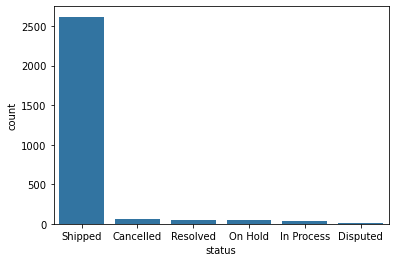

In [25]:
sns.countplot(data=df,x='status',color=b_color,order=df.status.value_counts().index);

>-  more than 2500 orders (92.7%) were shipped
>-  About 2.1% orders couldn't be resolved, they were cancelled
>-  Minimal disputed orders (0.5%)

## What is deal size distributed?

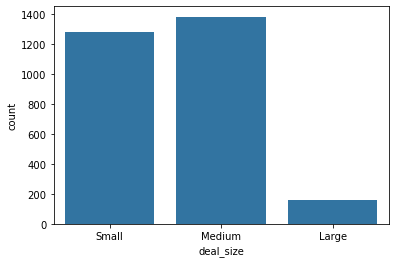

In [26]:
deal_size=['Small','Medium','Large'] 
order_sizes = pd.api.types.CategoricalDtype(ordered=True, categories=deal_size)
df['deal_size']=df['deal_size'].astype(order_sizes)
sns.countplot(data=df,x='deal_size',color=b_color);

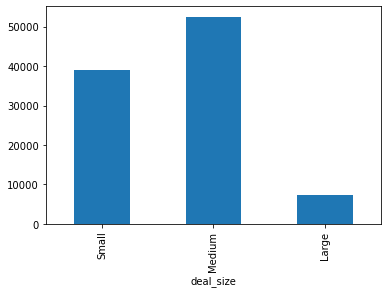

In [55]:
df.groupby(['deal_size'])['quantity_ordered'].sum().plot(kind='bar');

>### Observation
>-  Three unique deal sizes were represented in the data. Similar trends are noticeable considering the frenquency of orders and the sum of all others by deal sizes throughout the period.
>-  Customers seem to enjoy the Medium size the most and then the small deal size. However, they have low affection for Large deal sizes


## How are the product line distributed?

<AxesSubplot:xlabel='count', ylabel='product_line'>

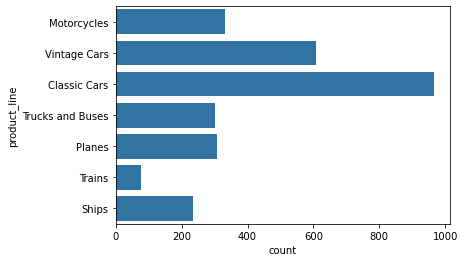

In [27]:
vt=['Motorcycles','Vintage Cars','Classic Cars','Trucks and Buses','Planes','Trains','Ships']
vt_order = pd.api.types.CategoricalDtype(ordered=True, categories=vt)
df['product_line']=df.product_line.astype(vt_order)
sns.countplot(data=df, y='product_line',color=b_color)

>### Observation
>- Classic cars is the highest (34.2%) sold product per transaction
>- Trains are the least sold per transaction

## How many active Customers are available?

In [56]:
df.customer_name.nunique()

92

## How frequent do customers make orders: who are the to top and least frequent customers?

In [28]:
# top 10 customers according to number of transactions made
pd.DataFrame(df.customer_name.value_counts()).head(10)

,customer_name
Euro Shopping Channel,259
Mini Gifts Distributors Ltd.,180
"Australian Collectors, Co.",55
La Rochelle Gifts,53
"AV Stores, Co.",51
Land of Toys Inc.,49
Muscle Machine Inc,48
Rovelli Gifts,48
"Anna's Decorations, Ltd",46
Souveniers And Things Co.,46


In [29]:
# leat 10 customers according to number of transactions made
pd.DataFrame(df.customer_name.value_counts()).tail(10)

,customer_name
"Men 'R' US Retailers, Ltd.",14
CAF Imports,13
West Coast Collectables Co.,13
"Double Decker Gift Stores, Ltd",12
Cambridge Collectables Co.,11
Microscale Inc.,10
Royale Belge,8
Auto-Moto Classics Inc.,8
Atelier graphique,7
Boards & Toys Co.,3


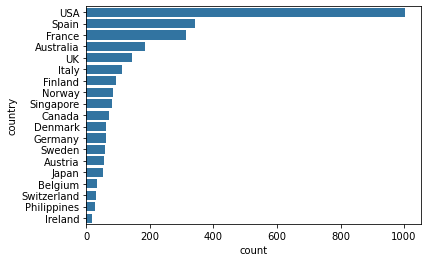

In [30]:
sns.countplot(data=df,y='country',color=b_color,order=df.country.value_counts().index);

last sale data collection happend in 0    December
Name: max_date, dtype: object,2005


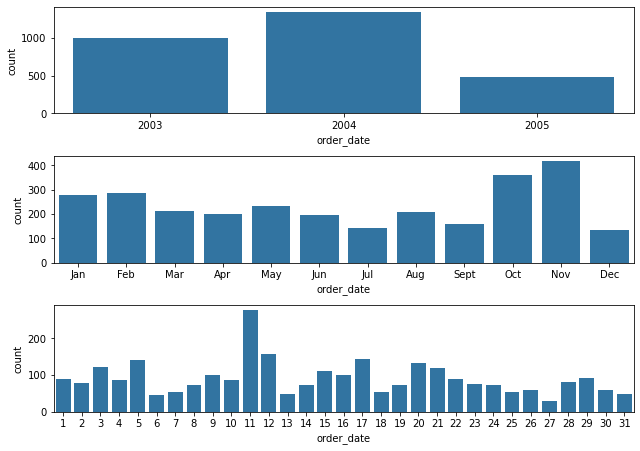

In [31]:
# Store the listing date breakdowns and their plotting indices in a dictionary
sale_breakdown = {
    'sale_years' : [1, df.order_date.dt.year],
    'sale_months' : [2, df.order_date.dt.month],
    'sale_days' : [3, df.order_date.dt.day],
}

# Plot the required information using a for loop
fig = plt.figure(figsize=(9, 8))

for key, value in sale_breakdown.items():
    plt.subplot(4, 1, value[0])
    sns.countplot(x= value[1], color = b_color)
    # Replace the month's integer values (0 - 12) with descriptive strings
    if (key == 'sale_months'):
        plt.xticks(np.arange(12), 
                   ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sept','Oct','Nov','Dec'])
plt.tight_layout();

x=pd.DataFrame([df.order_date.max(),])
x.columns=['max_date']
x.max_date=pd.to_datetime(x.max_date)
print('last sale data collection happend in {},2005'.format(x.max_date.dt.month_name()))

>-  Although there was a gradual increase in sales transctions between 2003 and 2004, it decline 2005
>-  Sales transaction mostly occure in Novembr
>-  Saless transactions vary everyday of the month. However, Day 11 seem to accomodate many sales transactions compared to other days

## Bivariate Exploratory Analysis

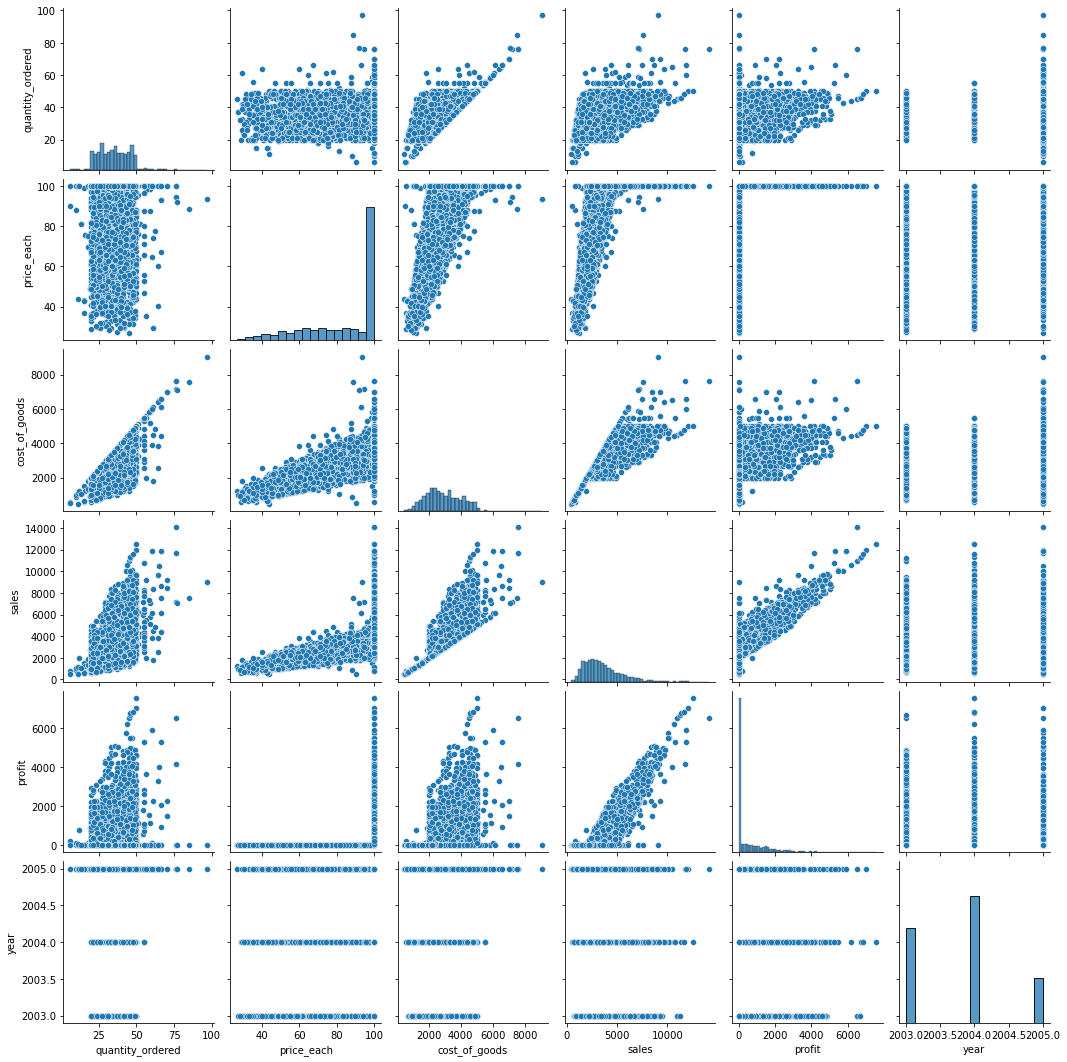

In [66]:
sns.pairplot(df)

>- As expected, there is a positive relation between sales and profit. 

<AxesSubplot:>

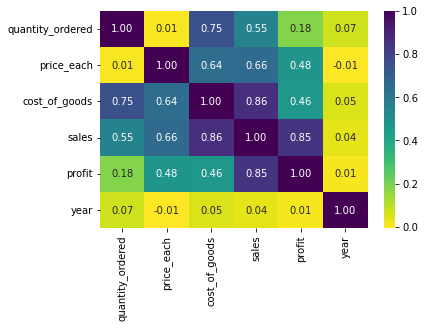

In [67]:

sns.heatmap(data=df.corr(),annot=True,fmt='.2f',cmap='viridis_r')

<AxesSubplot:xlabel='year', ylabel='profit'>

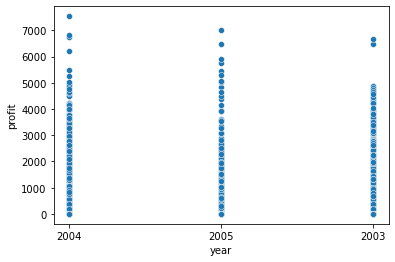

In [77]:
df.year=df.year.astype(str)
sns.scatterplot(data=df,x='year',y='profit')

## Explore relationship between concerned numeric variable with qualitative variable

In [34]:
df_c=df.set_index('order_date')
m_order=df_c.quantity_ordered.resample('1m').mean()

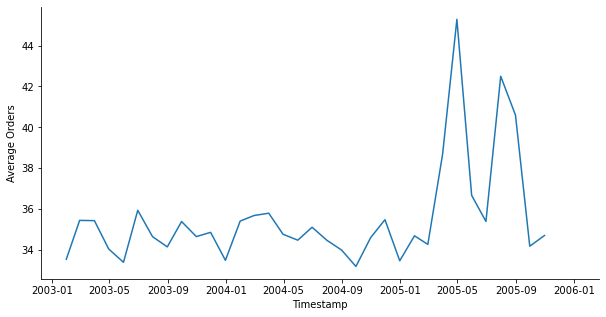

In [35]:
plt.figure(figsize=(10,5))
plt.plot(m_order.index,m_order.values)
sns.despine()
plt.xlabel('Timestamp')
plt.ylabel('Average Orders')
plt.show()

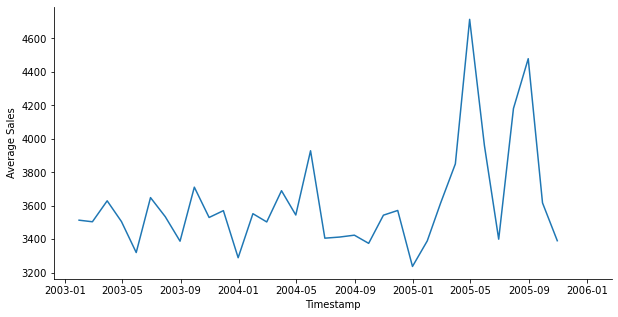

In [36]:
sales=df_c.sales.resample('1m').mean()
plt.figure(figsize=(10,5))
plt.plot(sales.index,sales.values)
sns.despine()
plt.xlabel('Timestamp')
plt.ylabel('Average Sales')
plt.show()

## Is there any relationship between the numeric variables and non-numeric variables

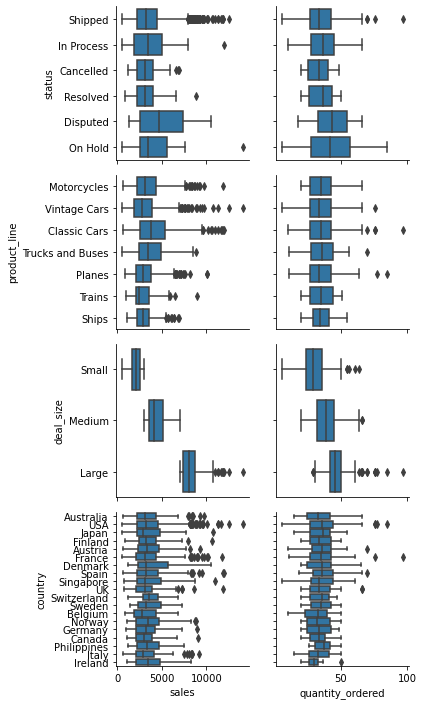

In [37]:
x_vals=['sales','quantity_ordered']
y_vals=['status','product_line','deal_size','country']
g=sns.PairGrid(data=df,x_vars=x_vals,y_vars=y_vals)
g.map(sns.boxplot,color=b_color)
plt.show()

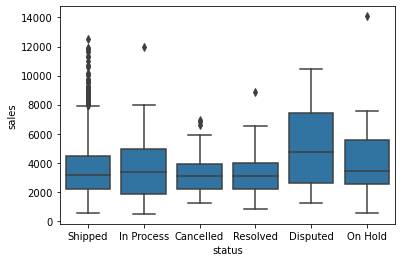

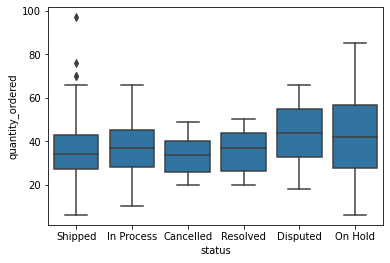

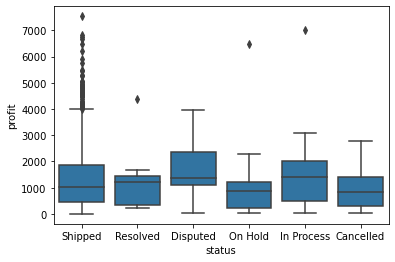

In [38]:
sns.boxplot(data=df, x='status',y='sales',color=b_color);
plt.show()
sns.boxplot(data=df, x='status',y='quantity_ordered',color=b_color);
plt.show()
sns.boxplot(data=df[df.profit>0], x='status',y='profit',color=b_color);

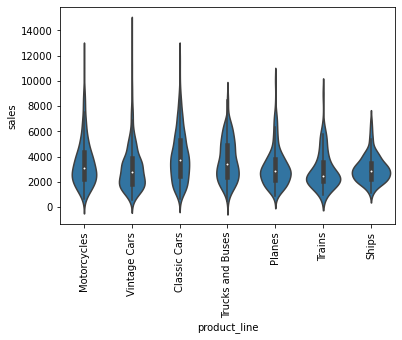

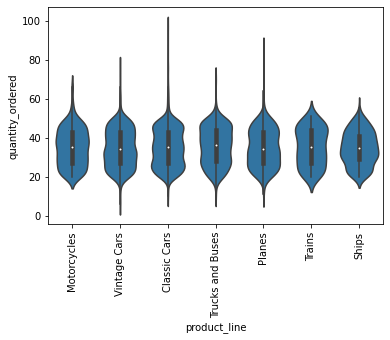

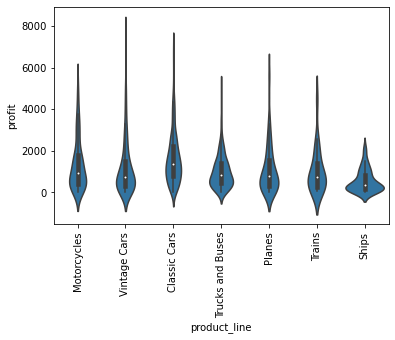

In [39]:
sns.violinplot(data=df, x='product_line',y='sales',color=b_color)
plt.xticks(rotation=90)
plt.show()

sns.violinplot(data=df, x='product_line',y='quantity_ordered',color=b_color)
plt.xticks(rotation=90)
plt.show()
sns.violinplot(data=df[df.profit>0], x='product_line',y='profit',color=b_color)
plt.xticks(rotation=90)
plt.show()

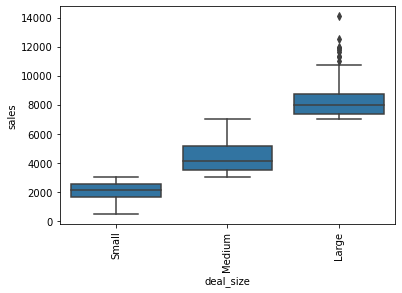

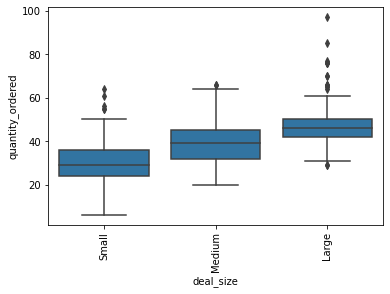

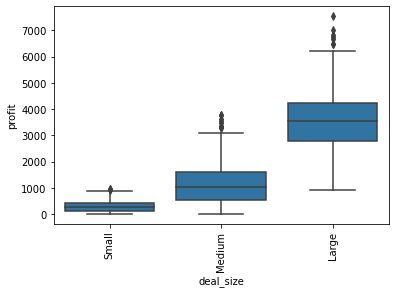

In [40]:
sns.boxplot(data=df, x='deal_size',y='sales',color=b_color)
plt.xticks(rotation=90)
plt.show()

sns. boxplot(data=df, x='deal_size',y='quantity_ordered',color=b_color)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df[df.profit>0], x='deal_size',y='profit',color=b_color)
plt.xticks(rotation=90)
plt.show()

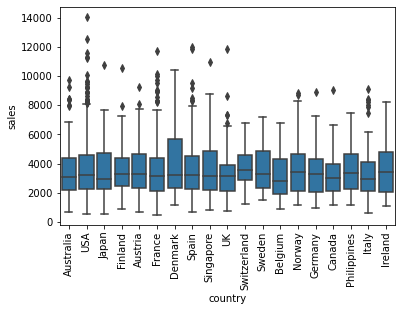

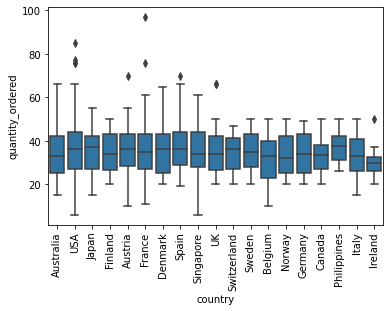

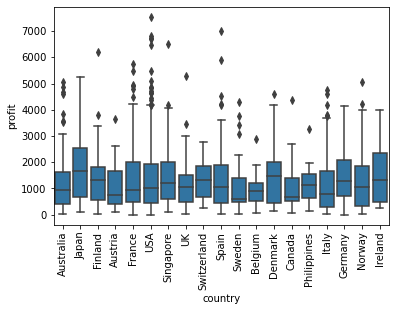

In [41]:
sns.boxplot(data=df, x='country',y='sales',color=b_color)
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df, x='country',y='quantity_ordered',color=b_color)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df[df.profit>0], x='country',y='profit',color=b_color)
plt.xticks(rotation=90)
plt.show()

# Multivariate visualization

<AxesSubplot:xlabel='quantity_ordered', ylabel='sales'>

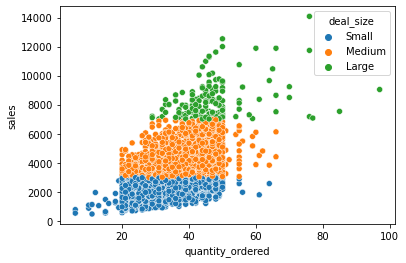

In [42]:
sns.scatterplot(data=df,x='quantity_ordered',y='sales',hue='deal_size')

<AxesSubplot:xlabel='quantity_ordered', ylabel='profit'>

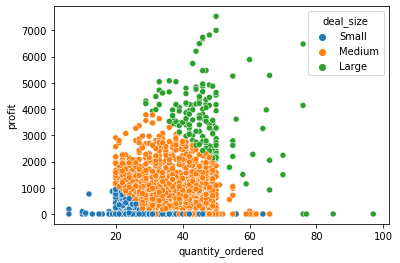

In [43]:
sns.scatterplot(data=df,x='quantity_ordered',y='profit',hue='deal_size')

<AxesSubplot:xlabel='quantity_ordered', ylabel='profit'>

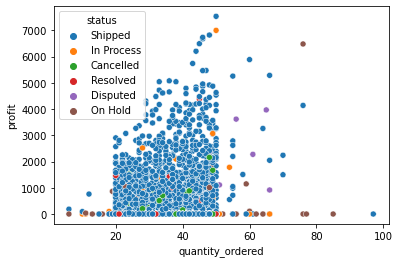

In [44]:
sns.scatterplot(data=df,x='quantity_ordered',y='profit',hue='status')

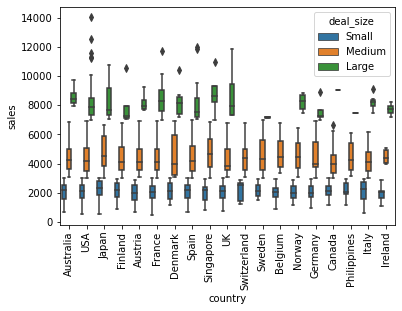

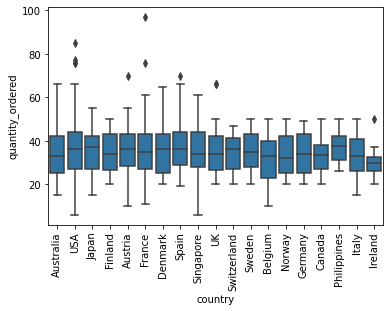

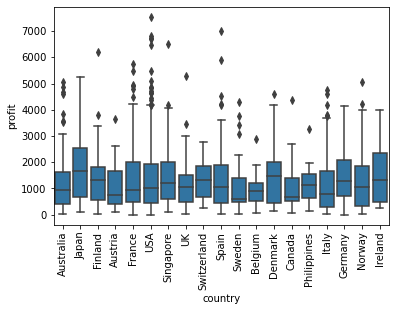

In [45]:
sns.boxplot(data=df, x='country',y='sales',hue='deal_size')
plt.xticks(rotation=90)
plt.show()

sns.boxplot(data=df, x='country',y='quantity_ordered',color=b_color)
plt.xticks(rotation=90)
plt.show()
sns.boxplot(data=df[df.profit>0], x='country',y='profit',color=b_color)
plt.xticks(rotation=90)
plt.show()

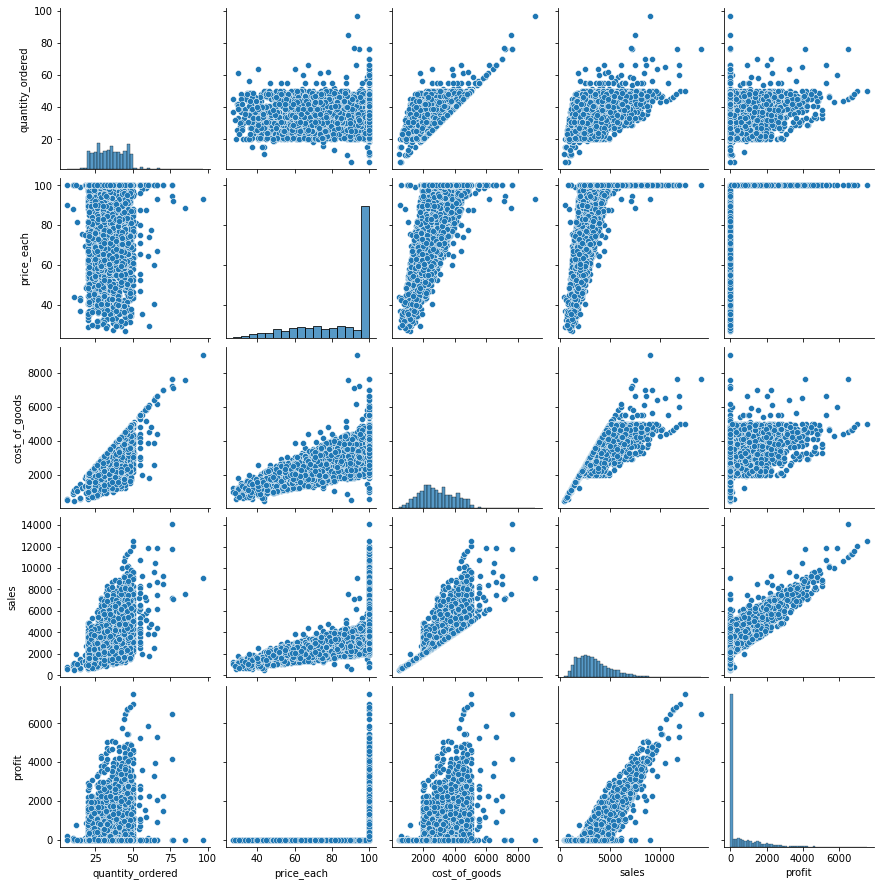

In [47]:
pd.crosstab(df.status,df.product_line)

product_line,Motorcycles,Vintage Cars,Classic Cars,Trucks and Buses,Planes,Trains,Ships
status,,,,,,,
Cancelled,0,13,16,0,12,1,18
Disputed,6,2,3,0,2,0,1
In Process,0,16,14,11,0,0,0
On Hold,1,9,12,4,9,1,8
Resolved,0,10,8,5,12,0,12
Shipped,324,557,914,281,271,75,195


In [48]:
df

,order_number,quantity_ordered,price_each,cost_of_goods,order_line_number,sales,profit,order_date,status,product_line,product_code,customer_name,city,postal_code,country,deal_size,name
0,10223,37,100.00,3700.00,1,3965.66,265.66,2004-02-20,Shipped,Motorcycles,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,Harmani Calderoni
1,10318,46,94.74,4358.04,1,4358.04,0.00,2004-02-11,Shipped,Motorcycles,S10_1678,Diecast Classics Inc.,Allentown,70267,USA,Medium,Harmani Calderoni
2,10210,34,100.00,3400.00,1,6123.40,2723.40,2004-12-01,Shipped,Motorcycles,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,Harmani Calderoni
3,10377,50,100.00,5000.00,1,5182.00,182.00,2005-09-02,Shipped,Classic Cars,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,Harmani Calderoni
4,10419,37,100.00,3700.00,1,5202.94,1502.94,2005-05-17,Shipped,Classic Cars,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,Harmani Calderoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,10168,27,73.02,1971.54,18,1971.54,0.00,2003-10-28,Shipped,Planes,S24_3949,Technics Stores Inc.,Burlingame,94217,USA,Small,Theodore Drayers
2819,10159,42,51.48,2162.16,18,2162.16,0.00,2003-10-10,Shipped,Motorcycles,S18_2625,Corporate Gift Ideas Co.,San Francisco,NaN,USA,Small,Theodore Drayers
2820,10222,36,63.34,2280.24,18,2280.24,0.00,2004-02-19,Shipped,Ships,S72_3212,Collectable Mini Designs Co.,San Diego,91217,USA,Small,Theodore Drayers
2821,10165,31,71.10,2204.10,18,2204.10,0.00,2003-10-22,Shipped,Trucks and Buses,S18_2432,"Dragon Souveniers, Ltd.",Singapore,79903,Singapore,Small,Theodore Drayers


In [51]:
df[df.profit>0]

,order_number,quantity_ordered,price_each,cost_of_goods,order_line_number,sales,profit,order_date,status,product_line,product_code,customer_name,city,postal_code,country,deal_size,name
0,10223,37,100.0,3700.0,1,3965.66,265.66,2004-02-20,Shipped,Motorcycles,S10_1678,"Australian Collectors, Co.",Melbourne,3004,Australia,Medium,Harmani Calderoni
2,10210,34,100.0,3400.0,1,6123.40,2723.40,2004-12-01,Shipped,Motorcycles,S10_4698,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,Harmani Calderoni
3,10377,50,100.0,5000.0,1,5182.00,182.00,2005-09-02,Shipped,Classic Cars,S12_4675,"Toys of Finland, Co.",Helsinki,21240,Finland,Medium,Harmani Calderoni
4,10419,37,100.0,3700.0,1,5202.94,1502.94,2005-05-17,Shipped,Classic Cars,S18_1589,Salzburg Collectables,Salzburg,5020,Austria,Medium,Harmani Calderoni
5,10405,55,100.0,5500.0,1,8289.05,2789.05,2005-04-14,Shipped,Classic Cars,S18_3232,Mini Caravy,Strasbourg,67000,France,Large,Harmani Calderoni
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2806,10332,26,100.0,2600.0,17,2979.08,379.08,2004-11-17,Shipped,Vintage Cars,S18_2957,"AV Stores, Co.",Manchester,EC2 5NT,UK,Small,Taylor Jole
2808,10210,31,100.0,3100.0,17,5719.50,2619.50,2004-12-01,Shipped,Planes,S18_1662,Osaka Souveniers Co.,Osaka,530-0003,Japan,Medium,Taylor Jole
2809,10312,48,100.0,4800.0,17,8078.40,3278.40,2004-10-21,Shipped,Vintage Cars,S18_1749,Mini Gifts Distributors Ltd.,San Rafael,97562,USA,Large,Taylor Jole
2810,10316,33,100.0,3300.0,17,4128.96,828.96,2004-01-11,Shipped,Classic Cars,S10_4757,giftsbymail.co.uk,Cowes,PO31 7PJ,UK,Medium,Taylor Jole


In [61]:
df['year']=df.order_date.dt.year

<AxesSubplot:xlabel='year'>

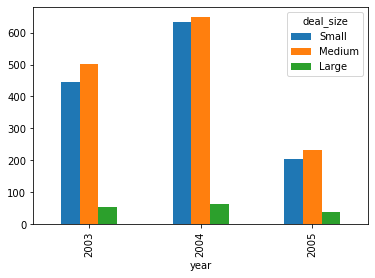

In [65]:
pd.crosstab(df.year,df.deal_size).plot(kind='bar')

In [70]:
df.year.value_counts()

2004    1345
2003    1000
2005     478
Name: year, dtype: int64